In [2]:
import pandas as pd
import json

In [3]:
df=pd.read_csv("ds_salaries.csv")

In [4]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df_2023=df[df['work_year']==2023]

In [6]:
df_2023.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df_2023['experience_level'].value_counts()

experience_level
SE    1287
MI     320
EN     118
EX      60
Name: count, dtype: int64

In [8]:
total_salary=sum(df_2023['salary_in_usd'].to_list())
total_salary

266046291

In [9]:
df_2023_SE=df_2023[df_2023['experience_level']=='SE']
SE_salary=sum(df_2023_SE['salary_in_usd'].to_list())
SE_salary

205365211

In [10]:
df_2023_MI=df_2023[df_2023['experience_level']=='MI']
MI_salary=sum(df_2023_MI['salary_in_usd'].to_list())
MI_salary

37215231

In [11]:
df_2023_EN=df_2023[df_2023['experience_level']=='EN']
EN_salary=sum(df_2023_EN['salary_in_usd'].to_list())
EN_salary

11243508

In [12]:
df_2023_EX=df_2023[df_2023['experience_level']=='EX']
EX_salary=sum(df_2023_EX['salary_in_usd'].to_list())
EX_salary

12222341

In [13]:
pie_data = {"data": []}
temp={'value':round(EX_salary/total_salary,3) , 'category': 'EX'}
pie_data["data"].append(temp)
temp={'value':round(EN_salary/total_salary,3) , 'category': 'EN'}
pie_data["data"].append(temp)
temp={'value':round(MI_salary/total_salary,3) , 'category': 'MI'}
pie_data["data"].append(temp)
temp={'value':round(SE_salary/total_salary,3) , 'category': 'SE'}
pie_data["data"].append(temp)

In [14]:
pie_data

{'data': [{'value': 0.046, 'category': 'EX'},
  {'value': 0.042, 'category': 'EN'},
  {'value': 0.14, 'category': 'MI'},
  {'value': 0.772, 'category': 'SE'}]}

In [15]:
with open('pie_data.json', 'w') as outfile:
	json.dump(pie_data, outfile)

In [16]:
df['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [40]:
'US' in df[df['experience_level'] == 'EN']['company_location'].unique()

True

In [31]:
json_salary=df[df['company_location'].isin(['CA', 'IL', 'NZ', 'PR', 'RU', 'US'])].groupby(['company_location', 'experience_level']).mean(['salary_in_usd']).sort_values(by='salary_in_usd', ascending=False).reset_index()[['salary_in_usd','experience_level', 'company_location']].to_dict(orient='records')

In [34]:
json_salary

[{'salary_in_usd': 423834.0,
  'experience_level': 'SE',
  'company_location': 'IL'},
 {'salary_in_usd': 207445.52040816325,
  'experience_level': 'EX',
  'company_location': 'US'},
 {'salary_in_usd': 167500.0,
  'experience_level': 'SE',
  'company_location': 'PR'},
 {'salary_in_usd': 158683.52298850575,
  'experience_level': 'SE',
  'company_location': 'US'},
 {'salary_in_usd': 150201.9836065574,
  'experience_level': 'SE',
  'company_location': 'CA'},
 {'salary_in_usd': 140333.33333333334,
  'experience_level': 'EX',
  'company_location': 'RU'},
 {'salary_in_usd': 127822.53923541248,
  'experience_level': 'MI',
  'company_location': 'US'},
 {'salary_in_usd': 125000.0,
  'experience_level': 'SE',
  'company_location': 'NZ'},
 {'salary_in_usd': 119059.0,
  'experience_level': 'MI',
  'company_location': 'IL'},
 {'salary_in_usd': 112058.75,
  'experience_level': 'EX',
  'company_location': 'CA'},
 {'salary_in_usd': 102400.6393442623,
  'experience_level': 'EN',
  'company_location': 'U

In [35]:
radar_data = {"data": json_salary}
radar_data


{'data': [{'salary_in_usd': 423834.0,
   'experience_level': 'SE',
   'company_location': 'IL'},
  {'salary_in_usd': 207445.52040816325,
   'experience_level': 'EX',
   'company_location': 'US'},
  {'salary_in_usd': 167500.0,
   'experience_level': 'SE',
   'company_location': 'PR'},
  {'salary_in_usd': 158683.52298850575,
   'experience_level': 'SE',
   'company_location': 'US'},
  {'salary_in_usd': 150201.9836065574,
   'experience_level': 'SE',
   'company_location': 'CA'},
  {'salary_in_usd': 140333.33333333334,
   'experience_level': 'EX',
   'company_location': 'RU'},
  {'salary_in_usd': 127822.53923541248,
   'experience_level': 'MI',
   'company_location': 'US'},
  {'salary_in_usd': 125000.0,
   'experience_level': 'SE',
   'company_location': 'NZ'},
  {'salary_in_usd': 119059.0,
   'experience_level': 'MI',
   'company_location': 'IL'},
  {'salary_in_usd': 112058.75,
   'experience_level': 'EX',
   'company_location': 'CA'},
  {'salary_in_usd': 102400.6393442623,
   'experienc

<Axes: >

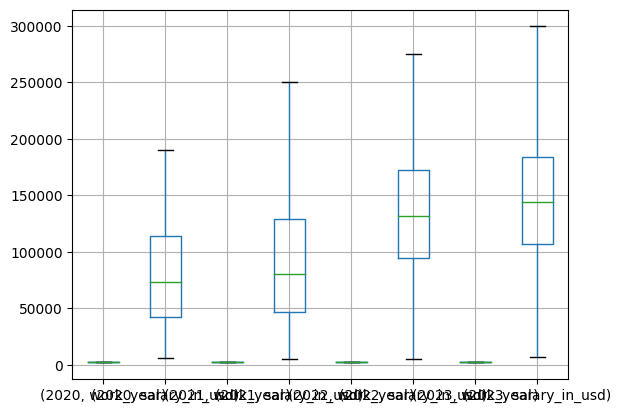

In [36]:
df[['work_year', 'salary_in_usd']].groupby('work_year').boxplot('work_year', showfliers=False)

In [54]:
for exp in ['SE', 'EX', 'MI', 'EN']:
    for loc in ['CA', 'IL', 'NZ', 'PR', 'RU', 'US']:
        found = False
        for data in radar_data['data']:
            if exp == data['experience_level'] and loc == data['company_location']:
                found = True
        if not found:
            radar_data['data'].append(dict(experience_level=exp, company_location=loc, salary_in_usd=10))

In [55]:
with open('radar_data2.json', 'w') as outfile:
	json.dump(radar_data, outfile)